## Exploratory data analysis for habermans cancer survival dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

haberman = pd.read_csv('haberman.csv')


In [6]:
#number of data points and features
shape=haberman.shape
print('The dataset has',shape[0],'entries/rows and ',shape[1],'coloums/features')

The dataset has 306 entries/rows and  4 coloums/features


In [7]:
#coloumn names in dataset
haberman.columns
feature=haberman.columns
i=1
for ele in feature:
    if(i==4):
        print(i, '.', ele," : This is also called as class label")
        break
    print(i,'.',ele)
    i+=1


1 . age
2 . year
3 . nodes
4 . status  : This is also called as class label


Feature Information:
1.age  : Age of patient during operation
2.year :Year in which the patient undergo operation
3.nodes: Cancer nodes detected in his body
4.status: 1- if patient survived after 5 years of operation 
          2- if patient died after  5 years of operation 

In [8]:
#data points per class label 
#How many patients of each status
haberman['status'].value_counts()



1    225
2     81
Name: status, dtype: int64

#### Oberservation : 1.This is a imbalanced dataset 
                    2.Patient which servived after five years of operation is more than that of those which are dead.
                    

### objective: To predict wheather patient will survive or not baased on the current age provided, the year of operation and number of cancer nodes detected in his body during dialysis

## 2D scatter plots

Scatter Plot:


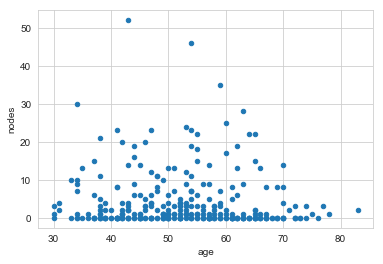

In [13]:
print("Scatter Plot:")
haberman.plot(kind='scatter',x='age',y='nodes')

Observation:Most of the patients have number of cancer nodes between 0 to 30

Scatter plot with color encoding:


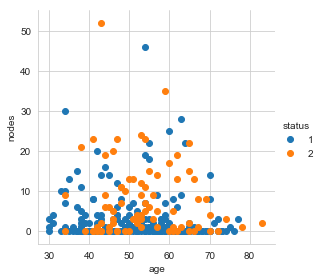

In [12]:
print('Scatter plot with color encoding:')
sb.set_style('whitegrid')
sb.FacetGrid(haberman,hue='status',height=4)\
   .map(plt.scatter,'age','nodes')\
   .add_legend();
plt.show();
plt.close();

C:\Users\P10461089\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


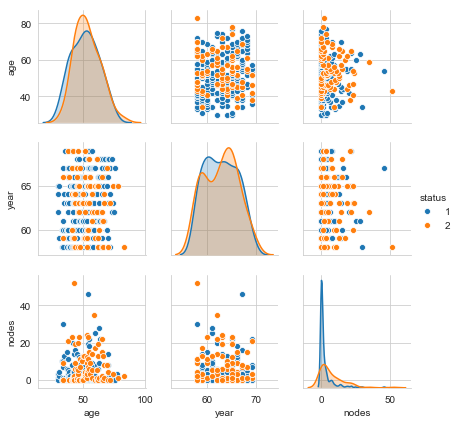

In [14]:
sb.set_style("whitegrid");               #Step1:Set the gird to white.
sb.pairplot(haberman, hue="status",vars=['age','year','nodes'] ,height=2); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()


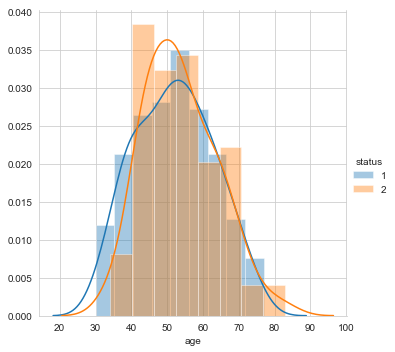

In [24]:
sb.FacetGrid(haberman,hue='status',height=5)\
    .map(sb.distplot,'age')\
    .add_legend();
plt.show()





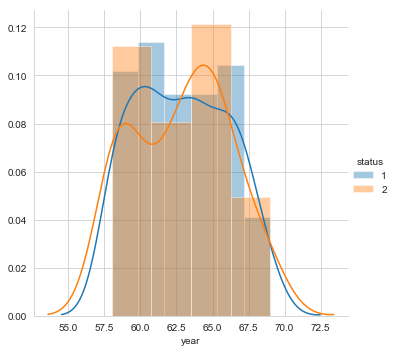

In [23]:
sb.FacetGrid(haberman,hue='status',height=5)\
    .map(sb.distplot,'year')\
    .add_legend();
plt.show()

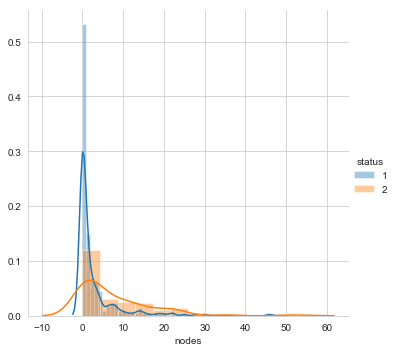

In [22]:
sb.FacetGrid(haberman,hue='status',height=5)\
    .map(sb.distplot,'nodes')\
    .add_legend();
plt.show()


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


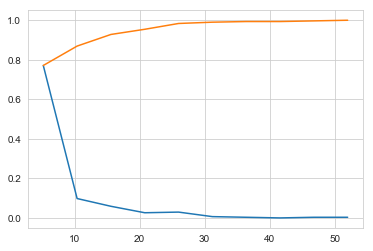

In [32]:
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


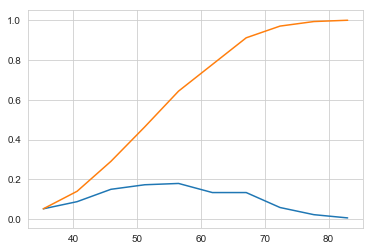

In [34]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


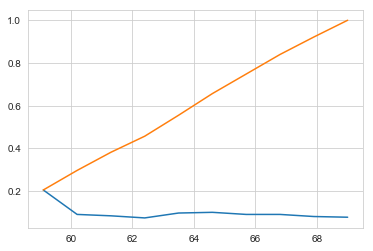

In [35]:
counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

box plots

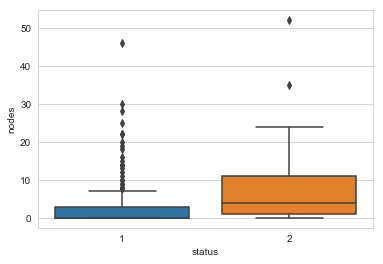

In [25]:
sb.boxplot(x='status',y='nodes',data=haberman)
plt.show()

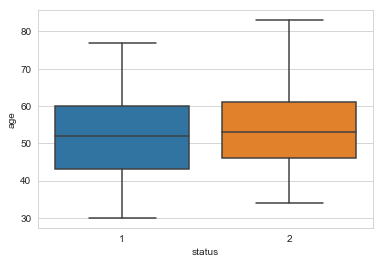

In [26]:
sb.boxplot(x='status',y='age',data=haberman)
plt.show()

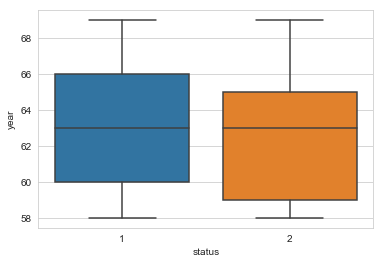

In [31]:
sb.boxplot(x='status',y='year',data=haberman)
plt.show()

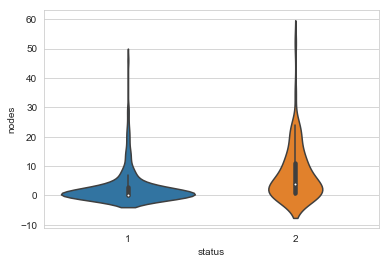

In [28]:
sb.violinplot(x='status',y='nodes',data=haberman)
plt.show()

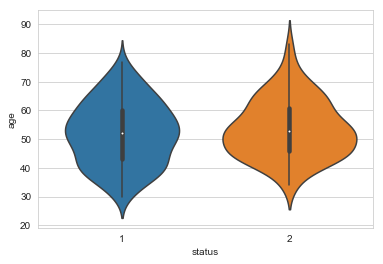

In [29]:
sb.violinplot(x='status',y='age',data=haberman)
plt.show()

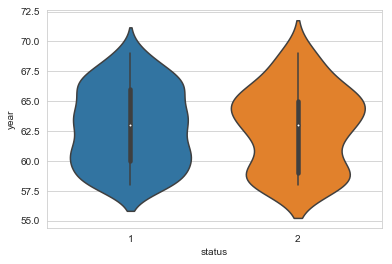

In [30]:
sb.violinplot(x='status',y='year',data=haberman)
plt.show()